# Práctica 3

## Datos y preprocesamiento

In [1]:
from keras.datasets import mnist
import numpy as np

2024-02-22 17:46:19.242485: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-22 17:46:19.294751: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-02-22 17:46:19.295988: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-22 17:46:20.233872: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
np.random.seed(42)

def balanced_mnist_set():
  (x_train, y_train), (x_test, y_test) = mnist.load_data()

  # Se obtiene una muestra con igual número de: cincos vs no cincos
  # para el conjunto de entrenamiento y el de test
  idx_y_train_5 = np.where(y_train == 5)[0]
  idx_y_train_n5 = np.where(y_train != 5)[0]
  idx_y_train_n5 = np.random.choice(idx_y_train_n5, idx_y_train_5.shape[0], replace=False)

  idx_y_train = np.concatenate([idx_y_train_5, idx_y_train_n5])
  np.random.shuffle(idx_y_train)

  x_train = x_train[idx_y_train]
  y_train = y_train[idx_y_train]

  idx_y_test_5 = np.where(y_test == 5)[0]
  idx_y_test_n5 = np.where(y_test != 5)[0]
  idx_y_test_n5 = np.random.choice(idx_y_test_n5, idx_y_test_5.shape[0], replace=False)

  idx_y_test = np.concatenate([idx_y_test_5, idx_y_test_n5])
  np.random.shuffle(idx_y_test)

  x_test = x_test[idx_y_test]
  y_test = y_test[idx_y_test]

  y_train_binary = (y_train == 5).astype(int)
  y_test_binary = (y_test == 5).astype(int)
  return (x_train, y_train_binary), (x_test, y_test_binary)

Primero obtenemos nuestro dataset balanceado de números que son 5 vs números que no son 5 y los normalizamos.

In [3]:
(x_train, y_train), (x_test, y_test) = balanced_mnist_set()

x_train = x_train / 255
y_train = y_train
x_test = x_test / 255
y_test = y_test

## Implementación de las RN y entrenamiento

Implementamos una red neuronal con dos neuronas en la primera capa y una en la salid
Para la función de activación, vamos a usar la función _sigmoid_, que nos beneficia ya que normalizamos los datos.

In [4]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.callbacks import EarlyStopping

# Definimos un callback para usar EarlyStopping
callback = EarlyStopping(monitor='accuracy', patience=3)

# Dos neuronas en la capa oculta.
# Una en la salid
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(2, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=40, batch_size=32, validation_split=0.2, callbacks=[callback])

2024-02-22 17:46:21.549719: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-02-22 17:46:21.550418: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


Epoch 1/40
272/272 [==============================] - 1s 3ms/step - loss: 0.4858 - accuracy: 0.8330 - val_loss: 0.4025 - val_accuracy: 0.9299
Epoch 2/40
272/272 [==============================] - 1s 3ms/step - loss: 0.3613 - accuracy: 0.9298 - val_loss: 0.3275 - val_accuracy: 0.9318
Epoch 3/40
272/272 [==============================] - 0s 2ms/step - loss: 0.3004 - accuracy: 0.9472 - val_loss: 0.2782 - val_accuracy: 0.9553
Epoch 4/40
272/272 [==============================] - 0s 2ms/step - loss: 0.2569 - accuracy: 0.9532 - val_loss: 0.2367 - val_accuracy: 0.9617
Epoch 5/40
272/272 [==============================] - 0s 2ms/step - loss: 0.2216 - accuracy: 0.9577 - val_loss: 0.2063 - val_accuracy: 0.9627
Epoch 6/40
272/272 [==============================] - 0s 2ms/step - loss: 0.1946 - accuracy: 0.9606 - val_loss: 0.1858 - val_accuracy: 0.9604
Epoch 7/40
272/272 [==============================] - 0s 2ms/step - loss: 0.1735 - accuracy: 0.9622 - val_loss: 0.1657 - val_accuracy: 0.9650
Epoch 

In [5]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

## Evaluación

Graficamos el historial del valor de _accuracy_:

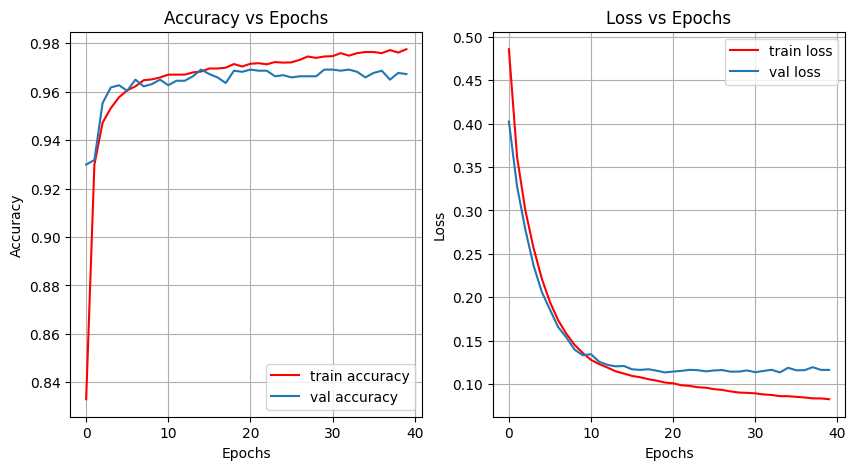

In [6]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(0, len(accuracy))

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, linestyle='-', color='red', label='train accuracy')
plt.plot(epochs, val_accuracy, linestyle='-', label='val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, linestyle='-', color='red', label='train loss')
plt.plot(epochs, val_loss, linestyle='-', label='val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss vs Epochs')
plt.grid(True)

plt.legend()
plt.show()

Mostramos errores en la clasificación

56/56 [==============================] - 0s 1ms/step


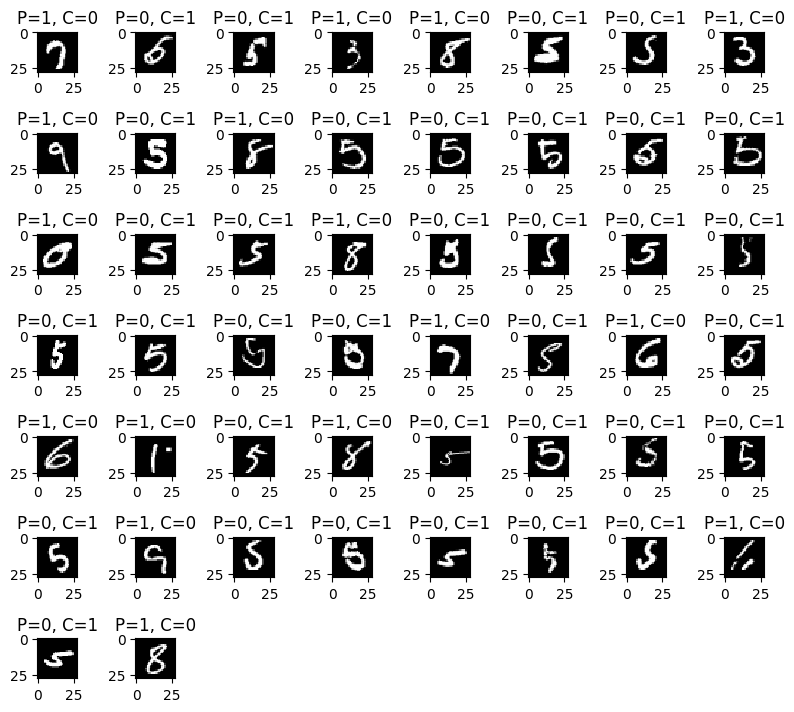

In [7]:
y_pred = (model.predict(x_test) >= 0.5).astype(int)[:,0]
incorrect_indices = np.nonzero(y_pred != y_test)[0]
plt.figure(figsize=(8,8))
for i, incorrect in enumerate(np.random.choice(incorrect_indices, 50, False)): #incorrect_indices[:49]):
    plt.subplot(8,8,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("P={}, C={}".format(y_pred[incorrect], y_test[incorrect].astype(int)))
    plt.tick_params(axis='both',which='both',bottom='off',left='off',labelbottom='off',labelleft='off')
plt.tight_layout()
plt.show()

Mostramos las métricas:

In [8]:
from sklearn.metrics import confusion_matrix, \
precision_score, recall_score,f1_score, accuracy_score

import pandas as pd

def get_metrics(model, x_test, y_test) -> pd.DataFrame:
  '''Calculates precision, recall and f1-score for
  both labels and stores the results in a DataFrame.'''

  y_pred = (model.predict(x_test) >= 0.5).astype(int)[:,0]

  accuracy = accuracy_score(y_test, y_pred)

  precision = precision_score(y_test, y_pred, pos_label=1)
  accuracy = accuracy_score(y_test, y_pred)
  recall = recall_score(y_test, y_pred, pos_label=1)
  f1_s = f1_score(y_test, y_pred, pos_label=1)

  precision_0 = precision_score(y_test, y_pred, pos_label=0)
  recall_0 = recall_score(y_test, y_pred, pos_label=0)
  f1_s_0 = f1_score(y_test, y_pred, pos_label=0)

  results = {
      'accuracy': accuracy,
      'precision': [precision, precision_0],
      'recall': [recall, recall_0],
      'f1_s': [f1_s, f1_s_0]
  }

  return pd.DataFrame(data=results)

In [9]:
metrics = get_metrics(model, x_test, y_test)
print(metrics)

56/56 [==============================] - 0s 2ms/step
   accuracy  precision    recall      f1_s
0  0.965807   0.974857  0.956278  0.965478
1  0.965807   0.957096  0.975336  0.966130
